In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from collections import Counter

In [2]:
normal_df = pd.read_csv("dataset/Sensor_data_Normal.csv", parse_dates=True, index_col='Timestamp')
attack_csv = pd.read_csv("dataset/Sensor_data_NA.csv", parse_dates=True, index_col='Timestamp')

In [3]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496800 entries, 2015-12-22 16:00:00 to 2015-12-28 09:59:59
Data columns (total 52 columns):
FIT101           496800 non-null float64
LIT101           496800 non-null float64
MV101            496800 non-null int64
P101             496800 non-null int64
P102             496800 non-null int64
AIT201           496800 non-null float64
AIT202           496800 non-null float64
AIT203           496800 non-null float64
FIT201           496800 non-null float64
MV201            496800 non-null int64
P201             496800 non-null int64
P202             496800 non-null int64
P203             496800 non-null int64
P204             496800 non-null int64
P205             496800 non-null int64
P206             496800 non-null int64
DPIT301          496800 non-null float64
FIT301           496800 non-null float64
LIT301           496800 non-null float64
MV301            496800 non-null int64
MV302            496800 non-null int64
MV303            4

In [4]:
attack_csv['Normal/Attack'].ne('Normal').idxmax()

Timestamp('2015-12-28 10:29:14')

In [5]:
first_occurence = attack_csv['Normal/Attack'].ne('Normal').idxmax()

In [6]:
normal_vals_from_attack = attack_csv[attack_csv.index < first_occurence]

In [7]:
normal_vals_from_attack

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:05,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.7530,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:06,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:07,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:08,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.9132,1.649953,189.5027,0.000128,1,1,1,Normal


## Append Normal data to create training data

In [8]:
training_data = normal_df.append(normal_vals_from_attack)

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498554 entries, 2015-12-22 16:00:00 to 2015-12-28 10:29:13
Data columns (total 52 columns):
FIT101           498554 non-null float64
LIT101           498554 non-null float64
MV101            498554 non-null int64
P101             498554 non-null int64
P102             498554 non-null int64
AIT201           498554 non-null float64
AIT202           498554 non-null float64
AIT203           498554 non-null float64
FIT201           498554 non-null float64
MV201            498554 non-null int64
P201             498554 non-null int64
P202             498554 non-null int64
P203             498554 non-null int64
P204             498554 non-null int64
P205             498554 non-null int64
P206             498554 non-null int64
DPIT301          498554 non-null float64
FIT301           498554 non-null float64
LIT301           498554 non-null float64
MV301            498554 non-null int64
MV302            498554 non-null int64
MV303            4

In [10]:
training_data.shape

(498554, 52)

In [11]:
test_data = attack_csv[attack_csv.index >= first_occurence]

In [12]:
test_data[test_data['Normal/Attack'] == 'A ttack']

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-30 09:51:08,2.645165,526.5757,2,2,1,220.1679,8.493848,325.9164,2.454362,2,...,2,1,252.0988,1.409669,190.4640,0.000128,1,1,1,A ttack
2015-12-30 09:51:09,2.662140,526.2225,2,2,1,220.1679,8.493848,325.9164,2.454875,2,...,2,1,252.0988,1.409669,190.4640,0.000128,1,1,1,A ttack
2015-12-30 09:51:10,2.662460,526.1047,2,2,1,220.1679,8.493848,325.9164,2.454875,2,...,2,1,252.0988,1.409669,190.6883,0.000128,1,1,1,A ttack
2015-12-30 09:51:11,2.640041,526.0262,2,2,1,220.1679,8.493848,325.9421,2.454875,2,...,2,1,252.2751,1.409669,190.7043,0.000128,1,1,1,A ttack
2015-12-30 09:51:12,2.624347,526.2225,2,2,1,220.1679,8.493848,325.9933,2.455772,2,...,2,1,252.3231,1.489764,190.7043,0.000128,1,1,1,A ttack
2015-12-30 09:51:13,2.616340,526.3795,2,2,1,220.1679,8.493848,325.9933,2.455772,2,...,2,1,252.3872,1.505783,190.7043,0.000128,1,1,1,A ttack
2015-12-30 09:51:14,2.604170,526.6150,2,2,1,220.1679,8.493848,325.9933,2.456156,2,...,2,1,252.3872,1.505783,190.7043,0.000128,1,1,1,A ttack
2015-12-30 09:51:15,2.582071,526.8113,2,2,1,220.1679,8.497693,325.9933,2.456156,2,...,2,1,252.3872,1.505783,190.7043,0.000128,1,1,1,A ttack
2015-12-30 09:51:16,2.565737,527.0075,2,2,1,220.1679,8.497693,325.9933,2.456156,2,...,2,1,252.5154,1.505783,190.7043,0.000128,1,1,1,A ttack


In [13]:
test_data['Normal/Attack'].replace('A ttack', 'Attack', inplace=True)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
Counter(test_data['Normal/Attack'])

Counter({'Attack': 53900, 'Normal': 394265})

In [21]:
test_data[0:3600]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:29:14,2.493675,817.6742,2,1,1,262.6250,8.465330,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack
2015-12-28 10:29:15,2.535951,817.9490,2,1,1,262.6250,8.465330,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack
2015-12-28 10:29:16,2.535951,817.9490,2,1,1,262.6250,8.465330,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack
2015-12-28 10:29:17,2.569900,818.4592,2,1,1,262.6250,8.465330,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack
2015-12-28 10:29:18,2.610575,818.8911,2,1,1,262.6250,8.465330,319.7385,0.0,1,...,2,1,250.0801,1.681991,188.9740,0.000128,1,1,1,Attack
2015-12-28 10:29:19,2.635557,818.6948,2,1,1,262.6250,8.465330,319.9436,0.0,1,...,2,1,250.1923,1.681991,188.9740,0.000128,1,1,1,Attack
2015-12-28 10:29:20,2.657336,819.3228,2,1,1,262.6250,8.465330,319.9436,0.0,1,...,2,1,250.1923,1.681991,188.9740,0.000128,1,1,1,Attack
2015-12-28 10:29:21,2.663741,819.7938,2,1,1,262.6250,8.465330,319.9436,0.0,1,...,2,1,250.1923,1.681991,189.0541,0.000128,1,1,1,Attack
2015-12-28 10:29:22,2.641642,820.0686,2,1,1,262.6250,8.465330,319.9436,0.0,1,...,2,1,250.1923,1.681991,189.0541,0.000128,1,1,1,Attack


In [22]:
training_labels = training_data['Normal/Attack']

KeyError: 'Normal/Attack'

In [23]:
training_labels.head()

Timestamp
2015-12-22 16:00:00    Normal
2015-12-22 16:00:01    Normal
2015-12-22 16:00:02    Normal
2015-12-22 16:00:03    Normal
2015-12-22 16:00:04    Normal
Name: Normal/Attack, dtype: object

In [17]:
training_data.drop(['Normal/Attack'], axis=1, inplace=True)

In [79]:
training_data.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
traini

In [25]:
training_data = np.asarray(training_data)

In [78]:
training_data

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [26]:
test_labels = test_data['Normal/Attack']

In [27]:
test_data.drop(['Normal/Attack'], axis=1, inplace=True)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
test_data.shape

(448165, 51)

In [29]:
test_data = np.asarray(test_data)

## Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
min_max = MinMaxScaler()

In [32]:
standard_scale = StandardScaler()

In [41]:
fil = lambda x:min_max.fit_transform(x)

In [33]:
training_data_norm = min_max.fit_transform(training_data)

In [34]:
training_data_scaled = standard_scale.fit_transform(training_data)

In [35]:
training_data_scaled.shape

(498554, 51)

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca_scale = PCA()

In [38]:
pca_transf_scale = pca_scale.fit(training_data_scaled)

In [45]:
pca_transf_scale.explained_variance_

array([  9.48722465e-01,   3.37355111e-01,   2.38934121e-01,
         1.39774212e-01,   7.24382498e-02,   5.81857583e-02,
         2.83810617e-02,   2.13319373e-02,   1.62543027e-02,
         1.48413099e-02,   9.75295234e-03,   8.36520539e-03,
         5.36181123e-03,   4.45449062e-03,   4.04220742e-03,
         3.14584697e-03,   2.89708297e-03,   2.73473490e-03,
         2.32804850e-03,   2.27154614e-03,   2.07432582e-03,
         1.97508567e-03,   1.68495941e-03,   1.17662706e-03,
         9.31668905e-04,   6.72979746e-04,   5.67234954e-04,
         4.95950788e-04,   3.70885158e-04,   3.69609121e-04,
         2.92231683e-04,   1.84972438e-04,   6.05017218e-05,
         5.65516613e-05,   2.97676829e-05,   2.49891710e-05,
         4.56557753e-06,   2.26923075e-06,   7.47950027e-07,
         1.64601583e-07,   1.87102516e-31,   5.31268348e-33,
         5.31268348e-33,   5.31268348e-33,   5.31268348e-33,
         5.31268348e-33,   5.31268348e-33,   5.31268348e-33,
         5.31268348e-33,

In [40]:
pca_transf_norm = pca_scale.fit(training_data_norm)

In [49]:
pca_transf_norm.explained_variance_

array([  9.48722465e-01,   3.37355111e-01,   2.38934121e-01,
         1.39774212e-01,   7.24382498e-02,   5.81857583e-02,
         2.83810617e-02,   2.13319373e-02,   1.62543027e-02,
         1.48413099e-02,   9.75295234e-03,   8.36520539e-03,
         5.36181123e-03,   4.45449062e-03,   4.04220742e-03,
         3.14584697e-03,   2.89708297e-03,   2.73473490e-03,
         2.32804850e-03,   2.27154614e-03,   2.07432582e-03,
         1.97508567e-03,   1.68495941e-03,   1.17662706e-03,
         9.31668905e-04,   6.72979746e-04,   5.67234954e-04,
         4.95950788e-04,   3.70885158e-04,   3.69609121e-04,
         2.92231683e-04,   1.84972438e-04,   6.05017218e-05,
         5.65516613e-05,   2.97676829e-05,   2.49891710e-05,
         4.56557753e-06,   2.26923075e-06,   7.47950027e-07,
         1.64601583e-07,   1.87102516e-31,   5.31268348e-33,
         5.31268348e-33,   5.31268348e-33,   5.31268348e-33,
         5.31268348e-33,   5.31268348e-33,   5.31268348e-33,
         5.31268348e-33,

In [47]:
pca_transf_scale.n_components_

51

In [50]:
pca_norm = PCA(n_components=2)

In [51]:
pca_norm.fit(training_data_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca_norm_transf = pca_norm.transform(training_data_norm)

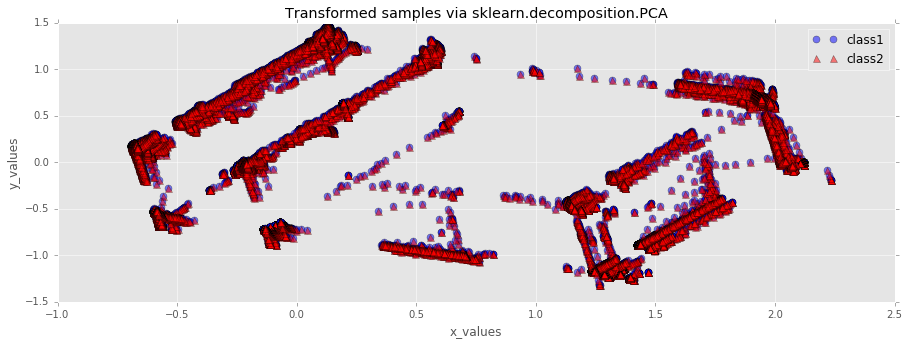

In [58]:
fig = plt.figure(figsize=(15,5))
plt.plot(pca_norm_transf[:,0], pca_norm_transf[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca_norm_transf[:,0], pca_norm_transf[:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

In [59]:
pca_inv_norm_transf = pca_norm.inverse_transform(pca_norm_transf)

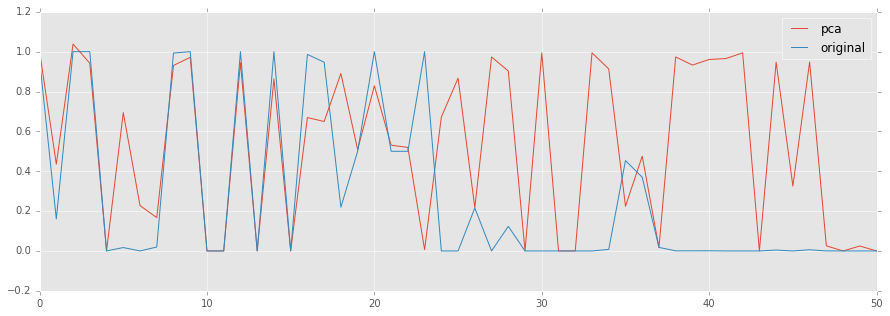

In [73]:
plt.figure(figsize=(15,5))
plt.plot(pca_inv_norm_transf[10], label='pca')
plt.plot(training_data_norm[10], label='original')
plt.legend()
plt.show()

In [74]:
diff = training_data_norm[0] - pca_inv_norm_transf[0]

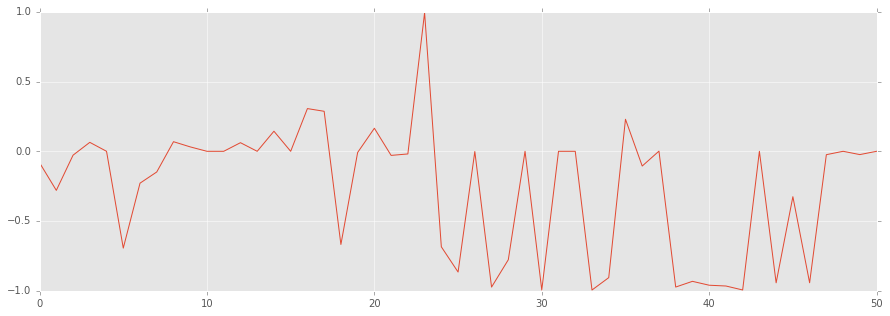

In [76]:
plt.figure(figsize=(15,5))
plt.plot(diff)